In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pickle
from os.path import join as opj
import os

In [2]:
baseFolder = "/home/dhruv/logs/exp6"
folders = os.listdir(baseFolder)
folders = sorted([opj(baseFolder, i) for i in folders])[-4:]
print(folders)


['/home/dhruv/logs/exp6/r6', '/home/dhruv/logs/exp6/r7', '/home/dhruv/logs/exp6/r8', '/home/dhruv/logs/exp6/r9']


In [3]:
# arr = []
# for folder_location in folders:
#     with open(opj(folder_location, "data.pickle"), "rb") as file:
#         COM_POS, COM_VEL, T_POS, T_VEL, left, right, COM_POS_DESIRED, COM_VEL_DESIRED, Torso_POS_DESIRED, Torso_VEL_DESIRED, LFt_POS_DESIRED, RFt_POS_DESIRED, FSM, Torque, Costs, t, LContact, RContact = pickle.load(file)
#     arr.append(COM_POS[-1])
    

In [4]:
# arr  =np.array(arr)

In [5]:
# mean = arr.mean(axis=0)
# cov = arr.std(axis=0)

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt 

# M_new_vec = np.array(mean)[:-1000]
# Sigma_new_vec = np.array(cov)[:-1000]
# t1 = t[:-1000]

# lower_bound = M_new_vec - Sigma_new_vec
# upper_bound = M_new_vec + Sigma_new_vec
# plt.plot(t1, M_new_vec, 'k')
# plt.fill_between(t1, lower_bound, upper_bound, alpha=0.5)


In [7]:
folder_location = r"/home/dhruv/logs/exp6/r8"
with open(opj(folder_location, "data.pickle"), "rb") as file:
    COM_POS, COM_VEL, T_POS, T_VEL, left, right, COM_POS_DESIRED, COM_VEL_DESIRED, Torso_POS_DESIRED, Torso_VEL_DESIRED, LFt_POS_DESIRED, RFt_POS_DESIRED, FSM, Torque, Costs, t, LeftContactForces, RightContactForces = pickle.load(file)
FSM = np.int32(FSM)    

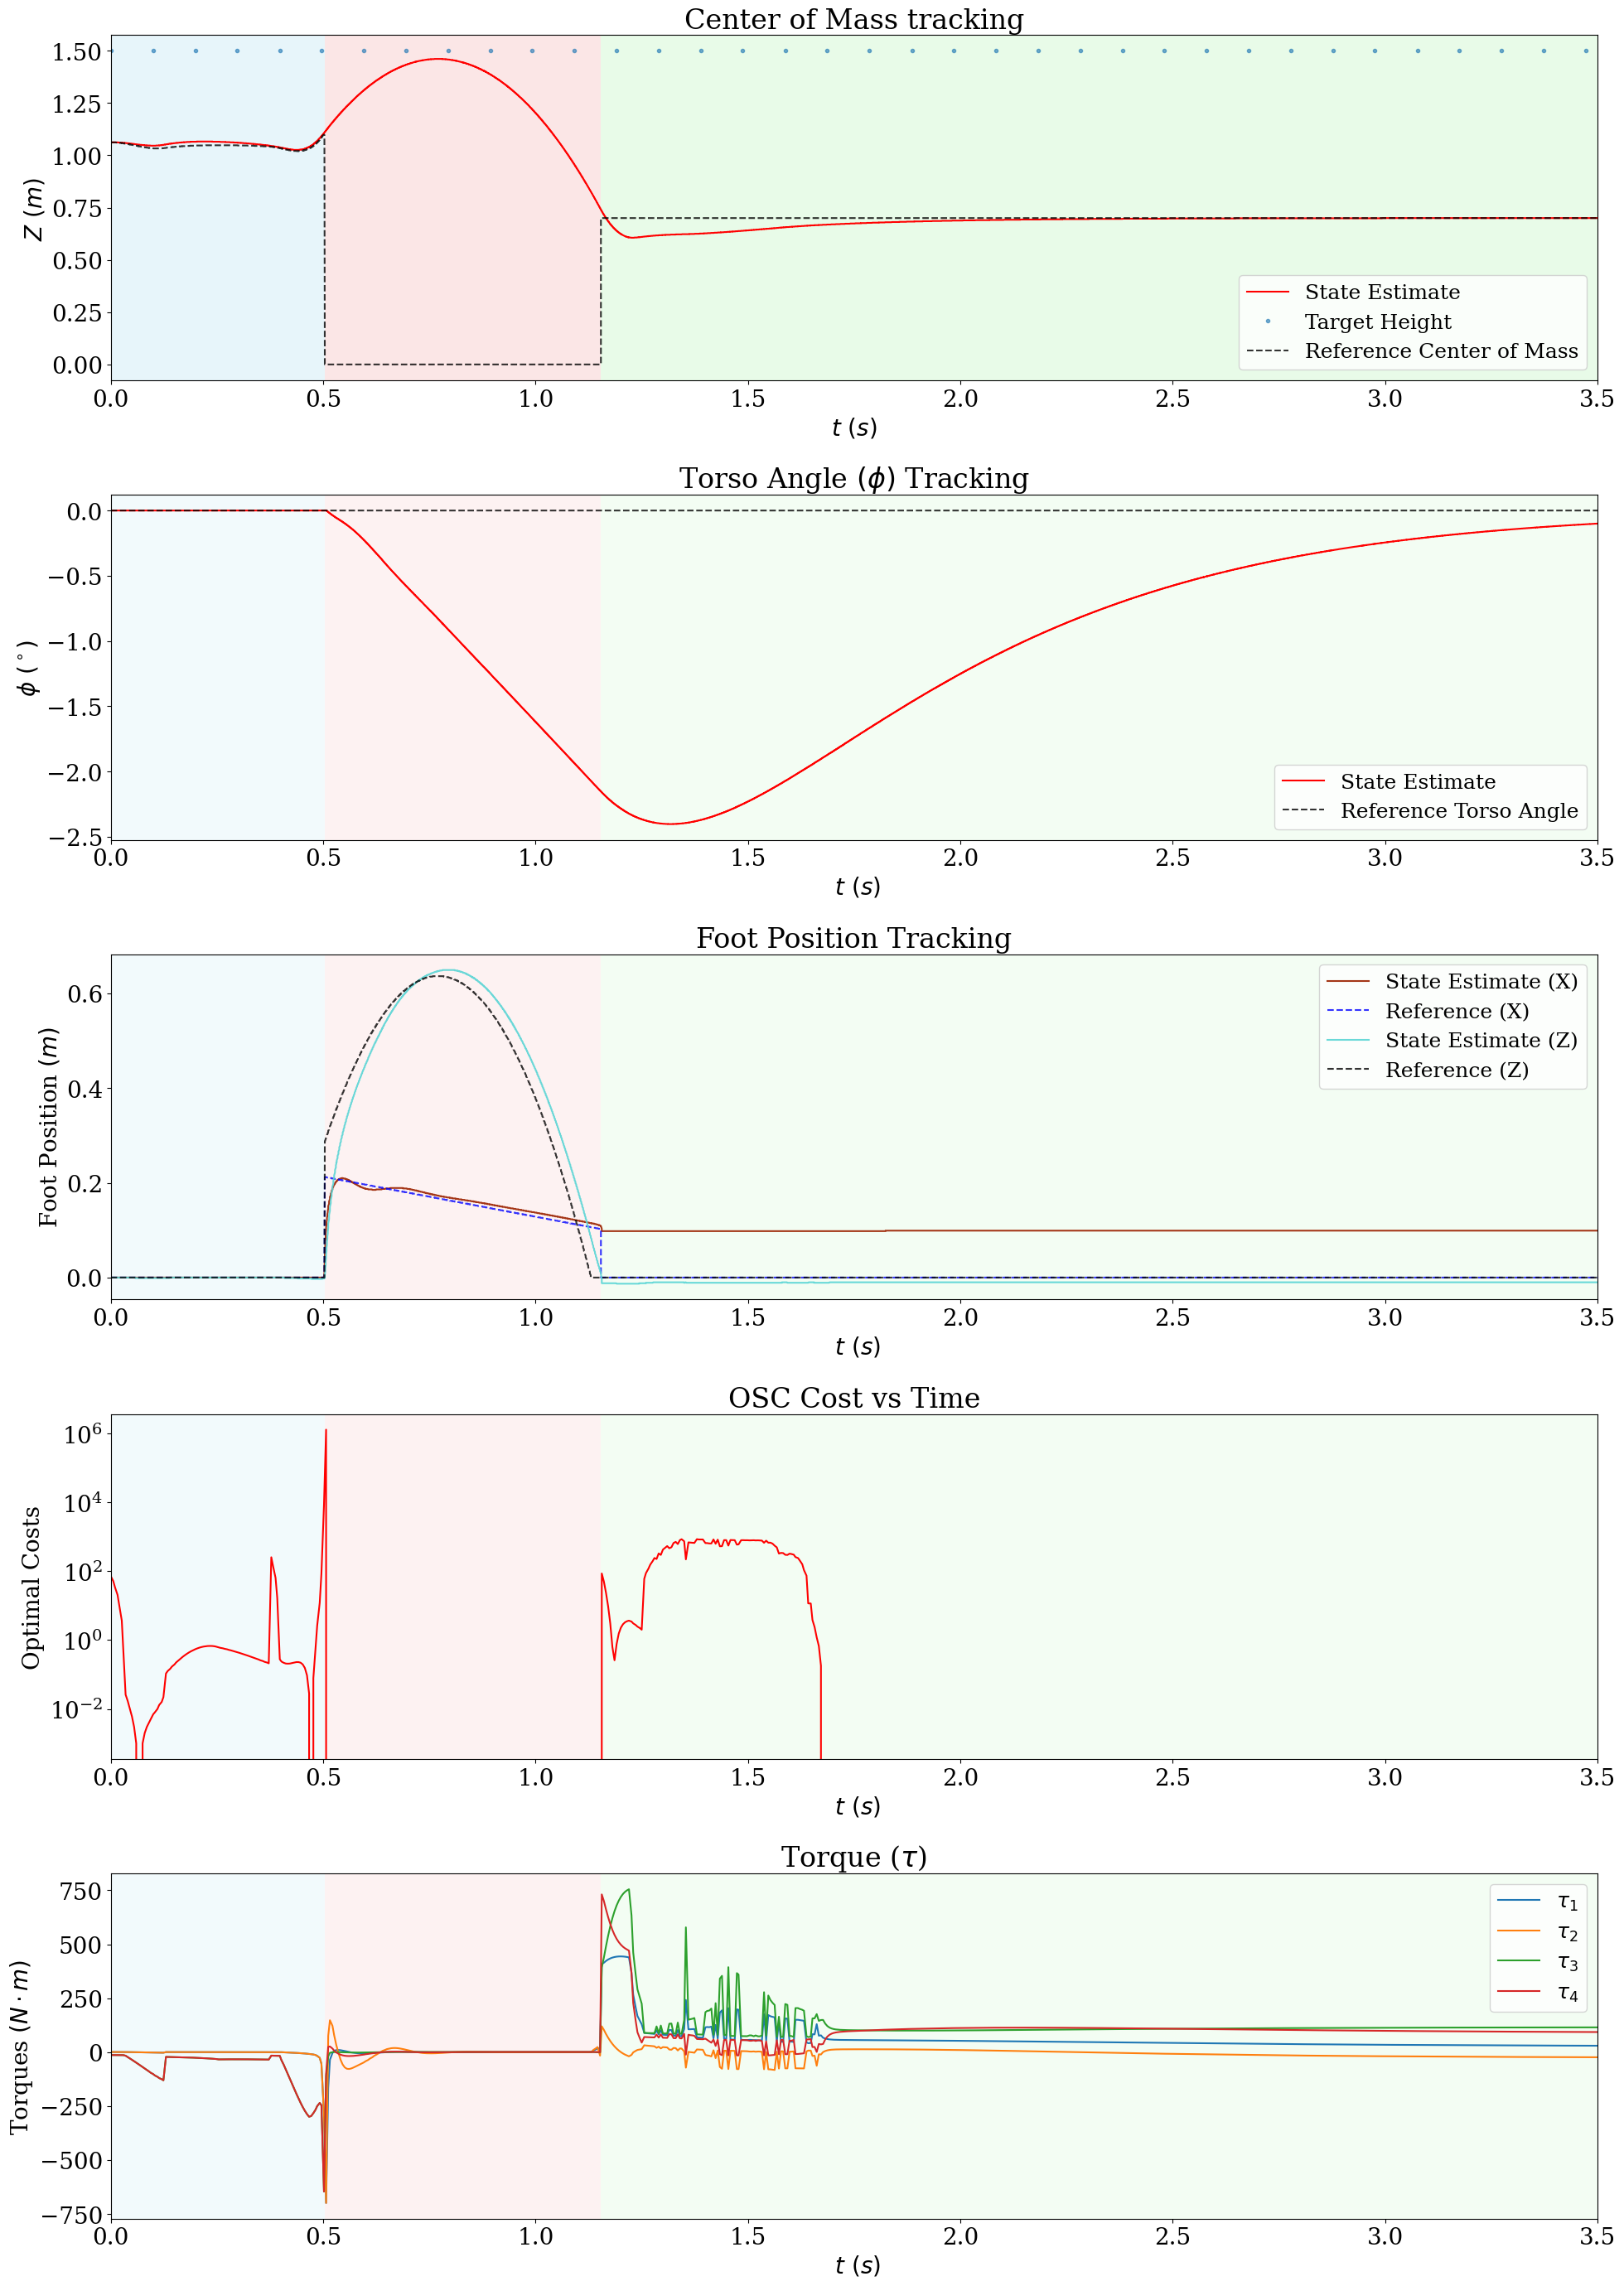

In [8]:
# plt.rcParams['text.usetex'] = False
import matplotlib
plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=18)
colors = ['skyblue', 'lightcoral', 'lightgreen']
# Find boundaries where the finite state changes
boundaries = np.where(np.diff(FSM[0, :]) != 0)[0]
boundaries = np.concatenate([[0], boundaries, [len(t)-1]])

mader = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']

# Function to create subplots for 3D data
def plot_3d_data(ax, t, data, label, linestyle='-', alpha=0.1):
    ax.plot(t, data[2, :], label=f'{label}', linestyle=linestyle, color="red")
    for i in range(0, len(boundaries)-1):
        start_idx, end_idx = boundaries[i]+1, boundaries[i+1]
        ax.axvspan(t[start_idx], t[end_idx], color=colors[FSM[0, start_idx]], alpha=alpha, lw=0)

def plot_3d_data_label(ax, t, data, label, linestyle='-', alpha=0.1):
    # ax.plot(t, data[0, :], label=f'{label} - X', linestyle=linestyle, color='r')
    ax.plot(t, data[2, :], label=f'{label}', linestyle=linestyle, color='k', alpha=0.8)
    for i in range(0, len(boundaries)-1):
        start_idx, end_idx = boundaries[i]+1, boundaries[i+1]
        ax.axvspan(t[start_idx], t[end_idx], color=colors[FSM[0, start_idx]], alpha=alpha, lw=0)

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(20, 28))
# fig, axs = plt.subplots(5, 1, figsize=(38, 28))

#### Z axis #####
plot_3d_data(axs[0], t, COM_POS, 'State Estimate', alpha=0.1)
axs[0].plot(t[::200], 1.5*np.ones_like(T_POS[0])[::200], '.',label = 'Target Height' ,alpha=0.6)
plot_3d_data_label(axs[0], t, COM_POS_DESIRED, 'Reference Center of Mass', '--', alpha=0.1)
axs[0].set_ylabel(r'$Z \ (m)$ ')
axs[0].set_xlabel(r"$t \ (s)$")
axs[0].set_xlim([0,t[-1]])
axs[0].set_title('Center of Mass tracking')
axs[0].legend(loc='lower right')

axs[1].plot(t, T_POS[0], label = 'State Estimate', color='red')
axs[1].plot(t, Torso_POS_DESIRED[0], label='Reference Torso Angle', linestyle='--', color='k', alpha=0.8)
for i in range(0, len(boundaries)-1):
    start_idx, end_idx = boundaries[i]+1, boundaries[i+1]
    axs[1].axvspan(t[start_idx], t[end_idx], color=colors[FSM[0, start_idx]], alpha=0.1, lw=0)
axs[1].set_ylabel(r"$ \theta \  (^\circ)$")
axs[1].set_xlabel(r" $t\ (s)$")
axs[1].set_xlim([0,t[-1]])
axs[1].set_title('Torso Angle $(\theta)$ Tracking')
axs[1].legend(loc='lower right')

axs[2].plot(t, left[0,:], label = 'State Estimate (X)', color='#a43617')
axs[2].plot(t, LFt_POS_DESIRED[0,:], label='Reference (X)', linestyle='--', color='b', alpha=0.8)
axs[2].plot(t, left[2,:], label = 'State Estimate (Z)', color='#5AD5D5', alpha=0.9)
axs[2].plot(t, LFt_POS_DESIRED[2,:], label='Reference (Z)', linestyle='--', color='k', alpha=0.8)
for i in range(0, len(boundaries)-1):
    start_idx, end_idx = boundaries[i]+1, boundaries[i+1]
    axs[2].axvspan(t[start_idx], t[end_idx], color=colors[FSM[0, start_idx]], alpha=0.1, lw=0)
axs[2].set_ylabel(r"Foot Position $(m)$")
axs[2].set_xlabel(r" $t\ (s)$")
axs[2].set_xlim([0,t[-1]])
axs[2].set_title('Foot Position Tracking')
axs[2].legend(loc='upper right')


axs[3].semilogy(t[::10], Costs[0][::10], color='red')
for i in range(0, len(boundaries)-1):
    start_idx, end_idx = boundaries[i]+1, boundaries[i+1]
    axs[3].axvspan(t[start_idx], t[end_idx], color=colors[FSM[0, start_idx]], alpha=0.1, lw=0)
axs[3].set_ylabel('Optimal Costs')
axs[3].set_xlabel(r" $t\ (s)$")
axs[3].set_xlim([0,t[-1]])
axs[3].set_title('OSC Cost vs Time')

axs[4].plot(t[::10], Torque[0,::10], label=r'$\tau_1$', color='C0')
axs[4].plot(t[::10], Torque[1,::10], label=r'$\tau_2$', color='C1')
axs[4].plot(t[::10], Torque[2,::10], label=r'$\tau_3$', color='C2')
axs[4].plot(t[::10], Torque[3,::10], label=r'$\tau_4$', color='C3')
for i in range(0, len(boundaries)-1):
    start_idx, end_idx = boundaries[i]+1, boundaries[i+1]
    axs[4].axvspan(t[start_idx], t[end_idx], color=colors[FSM[0, start_idx]], alpha=0.1, lw=0)
axs[4].set_ylabel(r'Torques $(N \cdot m)$')
axs[4].set_xlabel(r" $t\ (s)$")
axs[4].set_xlim([0,t[-1]])
axs[4].legend(loc='upper right')
axs[4].set_title(r'Torque ($\tau$)')



plt.tight_layout()
plt.savefig("lod.png", dpi=500)
plt.show()

